In [1]:
from autoencoders import *
from pdb_utils import *

In [2]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplot inline

UsageError: Line magic function `%matplot` not found.


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
structures = parsePdbFiles("PDBs")
print len(structures)

1385


In [5]:
import pickle
with open('pdb_groups.pkl', 'r') as f:
    pdb_groups = pickle.load(f)

In [ ]:
proteinmatrixdict = ProteinContactMapDict(structures, resize_to=(64,64), removeSymmetry=True)

d1dr9a1.pdb
d1bmld3.pdb
d1gkna1.pdb
d1ezvf_.pdb
d1fgsa2.pdb
d1dn0b1.pdb
d1a7ja_.pdb
d1bxea_.pdb
d1c9ka_.pdb
d1b0na2.pdb
d1goia3.pdb
d1e6ve1.pdb
d1b77b1.pdb
d1h2da_.pdb
d1fnfa1.pdb
d1dnla_.pdb
d1g6za1.pdb
d1evsa_.pdb
d1dcqa1.pdb
d1fuia2.pdb
d1b0xa_.pdb
d1bg3b2.pdb
d1gp3a_.pdb
d1gyta1.pdb
d1d8ka_.pdb
d1bkba1.pdb
d1eyea_.pdb
d1g9la1.pdb
d1bihb3.pdb
d1e9fa_.pdb
d1dxsa_.pdb
d1g3ng2.pdb
d1f1zb1.pdb
d1c12b1.pdb
d1b89a_.pdb
d1dmza_.pdb
d1am2a_.pdb
d1dqdh1.pdb
d1f0pa_.pdb
d1a8ha1.pdb
d1eg4a1.pdb
d1gkaa_.pdb
d1cnt4_.pdb
d1gqea_.pdb
d1e3ja2.pdb
d1bifa1.pdb
d1ddma_.pdb
d1gnwb2.pdb
d1dzla_.pdb
d1f97a1.pdb
d1bihb2.pdb
d1f58h1.pdb
d1b25a2.pdb
d1fjgi_.pdb
d1gzva_.pdb
d1f39a_.pdb
d1fada_.pdb
d1f7ua2.pdb
d1blea_.pdb
d1a9na_.pdb
d1b85b_.pdb
d1gjib2.pdb
d1bg3b3.pdb
d1f81a_.pdb
d1cz5a1.pdb
d1deeb2.pdb
d1fx2a_.pdb
d1bwdb_.pdb
d1ap2b_.pdb
d1g2pa_.pdb
d1c3ga2.pdb
d1h2sb_.pdb
d1ewqa4.pdb
d1d6ta_.pdb
d1e5oe_.pdb
d1guva2.pdb
d1al02_.pdb
d1aw9a1.pdb
d1c7ya2.pdb
d1ezvc2.pdb
d1gz2a_.pdb
d1h1cc_.pdb
d1gyya_.pdb
d1f5

d1f0xb1.pdb
d1ag8a_.pdb
d1ckma1.pdb
d1cr5b2.pdb
d1d2za_.pdb
d1ewja_.pdb
d1eika_.pdb
d1dxla1.pdb
d1ffkw_.pdb
d1brwb1.pdb
d1g0sb_.pdb
d1ev0b_.pdb
d1boca_.pdb
d1cb1a_.pdb
d1bfod2.pdb
d1fqjd2.pdb
d1e7ra_.pdb
d1gc1g_.pdb
d1cjka_.pdb
d1gg4b3.pdb


In [63]:
with open('protein_matrix_dict64.pkl', 'w') as f:
    pdb_groups = pickle.dump(proteinmatrixdict, f)

In [69]:
labels, features = proteinmatrixdict.keys(), proteinmatrixdict.values()
input_size = len(features[0])
print input_size

496


In [77]:
new_features, loss = LinearAutoencoder(features, input_size, 128, 100)

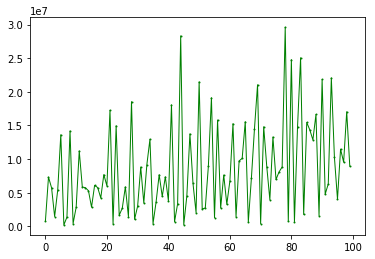

In [78]:
# LOSS GRAPH
fig, ax = plt.subplots()
ax.plot(range(0,len(loss)), loss, 'go-', linewidth=1, markersize=1)

In [ ]:
reset_graph()
hidden_output, W1, b1, W4, b4,loss = train_autoencoder(np.array(features), n_neurons=5000, n_epochs=10,output_activation=None)

# LOSS GRAPH
fig, ax = plt.subplots()
ax.plot(range(0,len(loss)), loss, 'go-', linewidth=1, markersize=1)

In [ ]:
reset_graph()
_, W2, b2, W3, b3,loss2 = train_autoencoder(hidden_output, n_neurons=500, n_epochs=10)

# LOSS GRAPH
fig, ax = plt.subplots()
ax.plot(range(0,len(loss2)), loss2, 'go-', linewidth=1, markersize=1)

In [ ]:
# Stacked Autoencoder
reset_graph()

n_inputs = input_size

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden1 = tf.nn.elu(tf.matmul(X, W1) + b1)
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2) + b2)
hidden3 = tf.nn.elu(tf.matmul(hidden2, W3) + b3)
outputs = tf.matmul(hidden3, W4) + b4

In [ ]:
def test_autoencoder(X_train):
    init = tf.global_variables_initializer()
    features = []
    with tf.Session() as sess:
        init.run()
        for protein in X_train:
            codings_val = hidden2.eval(feed_dict={X: [protein]})
            features.append(codings_val[0])
    return features

In [ ]:
new_features = test_autoencoder(features)

In [ ]:
# PCA
pca = PCA(n_components=2)
features2d = pca.fit_transform(np.array(new_features))
result_dict = dict(zip(labels, features2d))

In [ ]:
fig, ax = plt.subplots()

for protein, f2 in result_dict.items():
    if protein in B:
        ax.plot(f2[0], f2[1], 'ob')
    elif protein in C:
        ax.plot(f2[0], f2[1], 'or')
    elif protein in D:
        ax.plot(f2[0], f2[1], 'og')

plt.show()